In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=50)

target_names = lfw_people.target_names
print(f'number of people: {target_names.shape[0]}')

number of people: 12


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    lfw_people.data, lfw_people.target, test_size=0.3, random_state=7)

print(f'Number of rows in each data set -> all: {lfw_people.data.shape[0]}, train: {x_train.shape[0]}, test: {x_test.shape[0]}')

Number of rows in each data set -> all: 1560, train: 1092, test: 468


Dane zostały podzielone na dwa podzbiory: 1092 elementów danych treningowych i 468 danych testowych

In [4]:
from sklearn.decomposition import PCA

pca_100 = PCA(n_components=100)
pca_100.fit(x_train)
x_train_pca_100 = pca_100.transform(x_train)
x_test_pca_100 = pca_100.transform(x_test)

print(f'Dimension size for train data: {x_train_pca_100.shape[1]}, and test data: {x_test_pca_100.shape[1]}')

Dimension size for train data: 100, and test data: 100


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

mlp_clf = MLPClassifier(max_iter=500, random_state=7)
mlp_clf.fit(x_train_pca_100, y_train)
y_predict = mlp_clf.predict(x_test_pca_100)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=100, MLP classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')




#PCA_components=100, MLP classifier:
class: 0, precision: 0.8421052631578947, recall: 0.8888888888888888, f1 score: 0.8648648648648649
class: 1, precision: 0.8076923076923077, recall: 0.8076923076923077, f1 score: 0.8076923076923077
class: 2, precision: 0.7073170731707317, recall: 0.725, f1 score: 0.7160493827160493
class: 3, precision: 0.8765432098765432, recall: 0.9102564102564102, f1 score: 0.8930817610062893
class: 4, precision: 0.7804878048780488, recall: 0.7619047619047619, f1 score: 0.7710843373493976
class: 5, precision: 0.7916666666666666, recall: 0.76, f1 score: 0.7755102040816326
class: 6, precision: 0.35294117647058826, recall: 0.5454545454545454, f1 score: 0.42857142857142855
class: 7, precision: 0.7142857142857143, recall: 0.625, f1 score: 0.6666666666666666
class: 8, precision: 0.7857142857142857, recall: 0.6875, f1 score: 0.7333333333333333
class: 9, precision: 0.85, recall: 0.85, f1 score: 0.85
class: 10, precision: 0.9333333333333333, recall: 0.7777777777777778, f1 sc

In [6]:
from sklearn.svm import SVC

#empirically selected
sigma = 5
gamma = 1.0 / (2 * sigma**2)

svm_clf = SVC(kernel="rbf", gamma=gamma, random_state=7)

svm_clf.fit(x_train_pca_100, y_train)
y_predict = svm_clf.predict(x_test_pca_100)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict, zero_division=0)
print('#PCA_components=100, SVM(rbf) classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted', zero_division=0)
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=100, SVM(rbf) classifier:
class: 0, precision: 1.0, recall: 0.5555555555555556, f1 score: 0.7142857142857143
class: 1, precision: 0.671875, recall: 0.8269230769230769, f1 score: 0.7413793103448276
class: 2, precision: 0.7916666666666666, recall: 0.475, f1 score: 0.59375
class: 3, precision: 0.5714285714285714, recall: 0.9743589743589743, f1 score: 0.7203791469194313
class: 4, precision: 0.7777777777777778, recall: 0.3333333333333333, f1 score: 0.4666666666666667
class: 5, precision: 1.0, recall: 0.36, f1 score: 0.5294117647058824
class: 6, precision: 1.0, recall: 0.09090909090909091, f1 score: 0.16666666666666666
class: 7, precision: 1.0, recall: 0.375, f1 score: 0.5454545454545454
class: 8, precision: 1.0, recall: 0.125, f1 score: 0.2222222222222222
class: 9, precision: 0.9285714285714286, recall: 0.65, f1 score: 0.7647058823529411
class: 10, precision: 1.0, recall: 0.8333333333333334, f1 score: 0.9090909090909091
class: 11, precision: 0.7435897435897436, recall: 0.537

Jak możemy zauważyć, obydwa klasyfikatory, MLP i SVM z jądremRBF, radzą sobie z prawidłową klasyfikacją danych po redukcji PCA do 100 komponentów raczej dobrze. Precision dla obydwu metod wynosi po uśrednieniu ok 75%. Natomiast pod względem recall, dużo lepszym klasyfikatorem jest MLP z uśrednioną wartością recall 74%, podczas gdy SVM ma recall na ok 53%. Rożnica ta bierze się najpewniej z dużo większej liczby "false negatives" dla metody SVM.

In [7]:
pca_50 = PCA(n_components=50)
pca_50.fit(x_train)
x_train_pca_50 = pca_50.transform(x_train)
x_test_pca_50 = pca_50.transform(x_test)

mlp_clf = MLPClassifier(max_iter=500, random_state=7)
mlp_clf.fit(x_train_pca_50, y_train)
y_predict = mlp_clf.predict(x_test_pca_50)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=50, MLP classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')



#PCA_components=50, MLP classifier:
class: 0, precision: 0.6666666666666666, recall: 0.7777777777777778, f1 score: 0.717948717948718
class: 1, precision: 0.8461538461538461, recall: 0.8461538461538461, f1 score: 0.8461538461538461
class: 2, precision: 0.7352941176470589, recall: 0.625, f1 score: 0.6756756756756757
class: 3, precision: 0.8411764705882353, recall: 0.9166666666666666, f1 score: 0.8773006134969326
class: 4, precision: 0.6190476190476191, recall: 0.6190476190476191, f1 score: 0.6190476190476191
class: 5, precision: 0.68, recall: 0.68, f1 score: 0.68
class: 6, precision: 0.5555555555555556, recall: 0.45454545454545453, f1 score: 0.5
class: 7, precision: 0.8181818181818182, recall: 0.5625, f1 score: 0.6666666666666666
class: 8, precision: 0.7272727272727273, recall: 0.5, f1 score: 0.5925925925925926
class: 9, precision: 0.7916666666666666, recall: 0.95, f1 score: 0.8636363636363636
class: 10, precision: 0.9375, recall: 0.8333333333333334, f1 score: 0.8823529411764706
class: 1

In [8]:
from sklearn.svm import SVC

#empirically selected
sigma = 5.5
gamma = 1.0 / (2 * sigma**2)

svm_clf = SVC(kernel="rbf", gamma=gamma, random_state=7)

svm_clf.fit(x_train_pca_50, y_train)
y_predict = svm_clf.predict(x_test_pca_50)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=50, SVM(rbf) classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=50, SVM(rbf) classifier:
class: 0, precision: 0.9, recall: 0.5, f1 score: 0.6428571428571429
class: 1, precision: 0.6376811594202898, recall: 0.8461538461538461, f1 score: 0.7272727272727273
class: 2, precision: 0.8, recall: 0.5, f1 score: 0.6153846153846154
class: 3, precision: 0.601593625498008, recall: 0.967948717948718, f1 score: 0.742014742014742
class: 4, precision: 0.75, recall: 0.35714285714285715, f1 score: 0.4838709677419355
class: 5, precision: 0.8181818181818182, recall: 0.36, f1 score: 0.5
class: 6, precision: 1.0, recall: 0.09090909090909091, f1 score: 0.16666666666666666
class: 7, precision: 1.0, recall: 0.4375, f1 score: 0.6086956521739131
class: 8, precision: 0.5, recall: 0.0625, f1 score: 0.1111111111111111
class: 9, precision: 0.9285714285714286, recall: 0.65, f1 score: 0.7647058823529411
class: 10, precision: 0.9411764705882353, recall: 0.8888888888888888, f1 score: 0.9142857142857143
class: 11, precision: 0.6585365853658537, recall: 0.5, f1 score: 0

Po zmniejszeniu liczby komponentów PCA do 50 jakość klasyfikacji wyraźnie spada, i tak uśredniona wartość "precision" dla MLP i SVM wynosi odpowiednio 69% i 66%. "Recall" znów jest wyraźnie lepszy dla MLP i jest równy wartości "precision", natomiast dla SVM "recall" odstaje znacząco od "precision i wynosi 50%, co znów najpewniej wiąże się z dużą liczbą "false negatives".
Przy takich zależnościach pomiędzy "precision" i "recall", F1-Score również przemawia na korzyść modelu MLP.

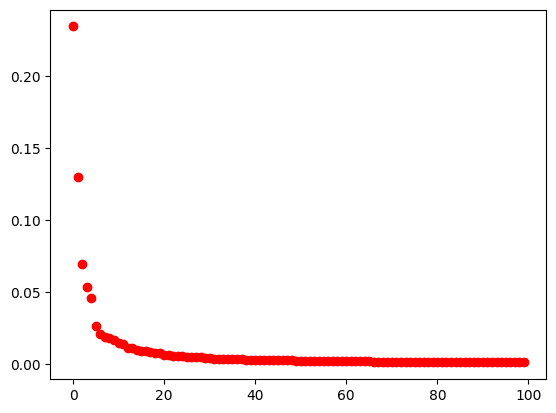

variation sum for first 10 components: 0.6326641887426376
variation sum for first 20 components: 0.7325066239573061
variation sum for first 50 components: 0.8400940056890249
variation sum for first 100 components: 0.9082609369070269


In [9]:
import matplotlib.pyplot as plt

variance_ratio = pca_100.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(f'variation sum for first 10 components: {sum(variance_ratio[:10])}')
print(f'variation sum for first 20 components: {sum(variance_ratio[:20])}')
print(f'variation sum for first 50 components: {sum(variance_ratio[:50])}')
print(f'variation sum for first 100 components: {sum(variance_ratio[:100])}')

Jak widzimy na powyższym histogramie, oraz na wylistowanych sumach wariancji dla odpowiednio 10, 20, 50 i 100 komponentów wiodących. Suma wariancji pierwszych 10 komponentów wiodących pokrywa aż 63% sumy wariancji na całym zbiorze, a wykres wartości wariancji dla komponentów wiodących wypłaszcza się znacząco w okolicach 20. komponentu.  
Kuszącą może wydawać się opcja użycia jedynie pierwszych 20 komponentów wiodących do klasyfikacji danych, jednakże klasyfikacja taka, jak pokażą kolejne sekcje tego notatnika, nie szczyci się wysoką wartością dla "precision" i "recall".
Jest tak, ponieważ wariancja kolejnych komponentów wiodących może i jest mała, natomiast ilość wymiarów jest na tyle duża, że suma wykluczonych wariancji ma widoczny wpływ na jakość klasyfikacji.

In [18]:
pca_20 = PCA(n_components=20)
pca_20.fit(x_train)
x_train_pca_20 = pca_20.transform(x_train)
x_test_pca_20 = pca_20.transform(x_test)

mlp_clf = MLPClassifier(max_iter=700, random_state=7)
mlp_clf.fit(x_train_pca_20, y_train)
y_predict = mlp_clf.predict(x_test_pca_20)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=20, MLP classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=20, MLP classifier:
class: 0, precision: 0.4090909090909091, recall: 0.5, f1 score: 0.45
class: 1, precision: 0.5666666666666667, recall: 0.6538461538461539, f1 score: 0.6071428571428571
class: 2, precision: 0.5666666666666667, recall: 0.425, f1 score: 0.4857142857142857
class: 3, precision: 0.78125, recall: 0.8012820512820513, f1 score: 0.7911392405063291
class: 4, precision: 0.4722222222222222, recall: 0.40476190476190477, f1 score: 0.4358974358974359
class: 5, precision: 0.52, recall: 0.52, f1 score: 0.52
class: 6, precision: 0.13333333333333333, recall: 0.18181818181818182, f1 score: 0.15384615384615385
class: 7, precision: 0.6428571428571429, recall: 0.5625, f1 score: 0.6
class: 8, precision: 0.38461538461538464, recall: 0.3125, f1 score: 0.3448275862068966
class: 9, precision: 0.7, recall: 0.7, f1 score: 0.7
class: 10, precision: 0.8125, recall: 0.7222222222222222, f1 score: 0.7647058823529411
class: 11, precision: 0.5789473684210527, recall: 0.6111111111111112, f

In [11]:
from sklearn.svm import SVC

#empirically selected
sigma = 5
gamma = 1.0 / (2 * sigma**2)

svm_clf = SVC(kernel="rbf", gamma=gamma, random_state=7)

svm_clf.fit(x_train_pca_20, y_train)
y_predict = svm_clf.predict(x_test_pca_20)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict, zero_division=0)
print('#PCA_components=20, SVM(rbf) classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted', zero_division=0)
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=20, SVM(rbf) classifier:
class: 0, precision: 0.0, recall: 0.0, f1 score: 0.0
class: 1, precision: 0.4864864864864865, recall: 0.6923076923076923, f1 score: 0.5714285714285714
class: 2, precision: 0.782608695652174, recall: 0.45, f1 score: 0.5714285714285714
class: 3, precision: 0.5050847457627119, recall: 0.9551282051282052, f1 score: 0.6607538802660754
class: 4, precision: 0.4, recall: 0.047619047619047616, f1 score: 0.0851063829787234
class: 5, precision: 0.6666666666666666, recall: 0.16, f1 score: 0.25806451612903225
class: 6, precision: 0.0, recall: 0.0, f1 score: 0.0
class: 7, precision: 0.875, recall: 0.4375, f1 score: 0.5833333333333334
class: 8, precision: 0.0, recall: 0.0, f1 score: 0.0
class: 9, precision: 0.8571428571428571, recall: 0.3, f1 score: 0.4444444444444444
class: 10, precision: 0.9375, recall: 0.8333333333333334, f1 score: 0.8823529411764706
class: 11, precision: 0.6363636363636364, recall: 0.3888888888888889, f1 score: 0.4827586206896552
avg-value

Na samym wstępie warto odnotować, że po zredukowaniu liczby wymiarów danych do pierwszych 20 komponentów wiodących, model MLP potrzebuje więcej o 40% więcej iteracji, aby optymalizator stochastyczny uzyskał zbieżność, a więc dla tego modelu, potencjalna oszczędność czasu przy przetwarzaniu PCA, zostanie skompensowana dłuższą pracą klasyfikatora.  

W przykładzie dla 20 komponentów wiodących wartość "precision" dla klasyfikatora SVM jest wyższa od tego dla MLP i wynosi odpowiednio 64% i 56%, jednakże wartośc dla "recall" w przypadku MLP jest wyżasza od jej wartości dla "precision", przez co F1-Score wynosi po uśrednieniu 58%. W przypadku SVM "recall" jest dużo mniejszy od "precision" i wynosi zaledwie 39% (ponownie dużo "false negatives"), więc uśredniony F1-Score dla SVM, o wartości 48%, pozostaje niższy od tego dla klasyfikatora MLP.  

Jak zaznaczyliśmy już analizując "scree plot", suma wariancji dla pierwszy 20 komponentów wiodących nie daje klasyfikacji wystarczającej jakości i powinniśmy raczej wybrać większą liczbę komponentów wiodących, jak chociażby 100 z pierwszego przykładu.

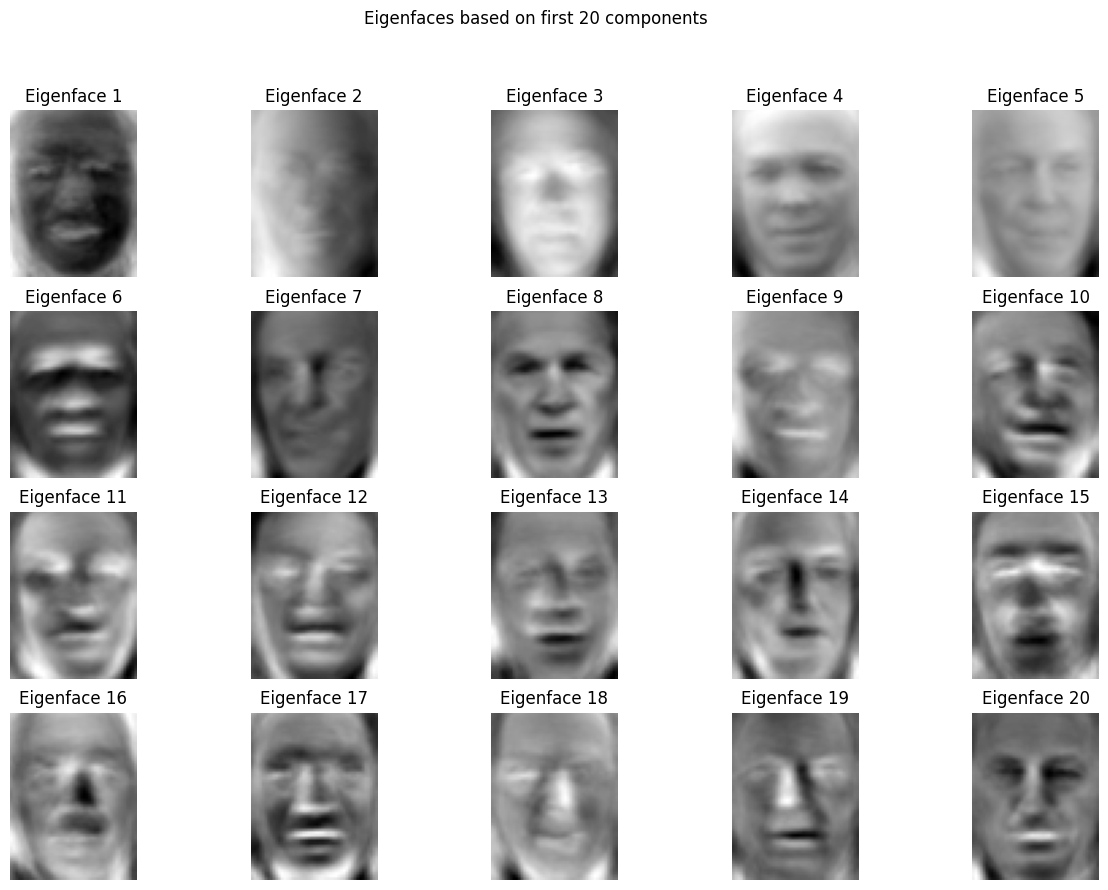

In [12]:
h, w = lfw_people.images[0].shape
eigenfaces = pca_20.components_[:20].reshape(-1, h, w)

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.suptitle('Eigenfaces based on first 20 components')
plt.show()

Eigenfaces w bardzo obrazowy sposób pokazują relewantność poszczególnych fragmentów obrazu, w tym wypadku fragmentów ludzkiej twarzy, dla wyodrębnionych komponenów wiodących. I tak możemy zaobserwować, że dla niektórych komponentów wiodących duża ich wariancji wywodzi się z analizy pikseli odpowiedzialnych za kształt twarzy czy też tło, a dla innych z fragmentu obrazu odpowiadającemu kształtowi nosa, oczy czy ust.
Oczywiście jednoznaczne zmapowanie komponentów na poszczególne fragmenty twarzy ludzkiej nie jest możliwe, gdyż niektóre komponenty wiodące się ze sobą poniekąd pokrywają, jednakże eigenfaces wyraźnie nam pokazują, że poniekąd taka relacja: fragment twarzy - komponent wiodący, jest do zaobserwowania.